We consider exp(-x^2/2sigma^2) as the pdf used to extract points for the MC Integration

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def func(x):
    return x**3

sigma=1
N=10000
# generating random points following a gaussian distribution
xi=np.abs(np.random.normal(loc=0,scale=sigma,size=N))

# while calculating the integral, we have to notece that the lenght of the sample is twice what we'd like to use for N
# (given the np.abs function used to select positive values)
# because of that, the value must be divided by 2 to obtain the actual distribution
# in addition, it is necessary to multiply by the normalization factor of the gaussian distribution
integral=np.sqrt(2*np.pi*sigma**2)*np.mean(func(xi))/2
print(f'Integral value is: {integral:.4f}, while the expected value is {2*sigma**4:.4f}')

Integral value is: 2.0079, while the expected value is 2.0000


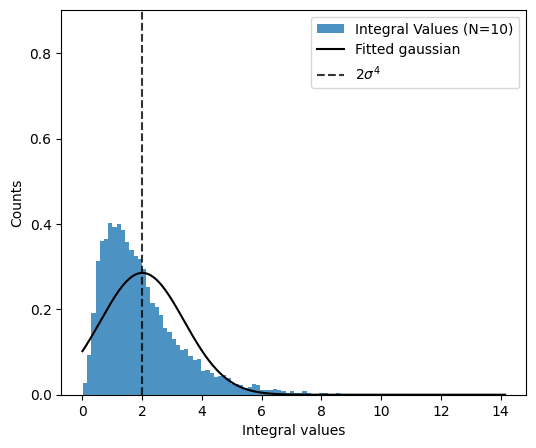

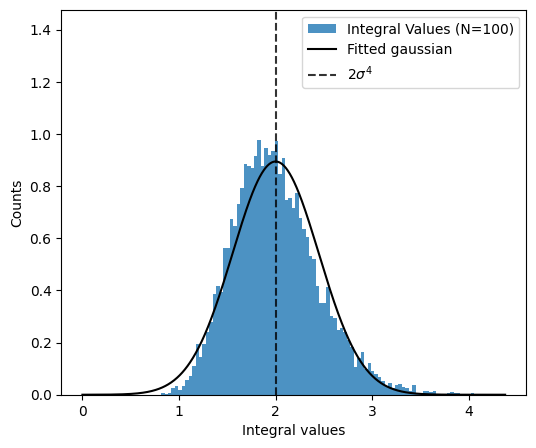

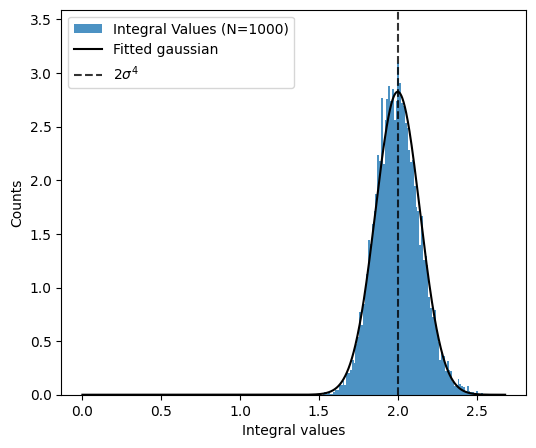

In [2]:
from scipy.stats import norm
sigma=1

def gaus(x,a,x0,sigma):
    return a*exp(-(x-x0)**2/(2*sigma**2))

def binom_pmf(x, n, p):
    return stats.binom.pmf(x, int(n), p)

# doing the same integral many times for a given N
N=[10,100,1000]
N_sim=10000
for j in N:
    fig,ax=plt.subplots(1,1,figsize=(6,5))
    integral=[]
    for i in range(N_sim):
        # generating random points following a gaussian distribution
        xi=np.abs(np.random.normal(loc=0,scale=sigma,size=j))
        integral.append(np.sqrt(2*np.pi*sigma**2)*np.mean(func(xi))/2)

    counts, bin_edges, _ = ax.hist(integral, bins=100,range=(min(integral),max(integral)),label='Integral Values (N='+str(j)+')',alpha=0.8,density=True)
    x=np.linspace(0,max(integral),1000)

    # trying to fit the integral distribution using a gaussian,
    # it is clear that for small N values the fit is not very gaussian,
    # but as soon as N increases you reobtain a gaussian
    mu,std = norm.fit(integral)
    ax.plot(x,norm(loc=mu,scale=std).pdf(x),color='k',linestyle='-',label='Fitted gaussian')
    ax.vlines(2*sigma**4,0,N_sim,color='black',linestyle='--',label=r'$2\sigma^4$',alpha=0.8)
    ax.set(xlabel=r'Integral values',ylabel='Counts',ylim=(0,max(counts)+0.5))
    ax.legend()

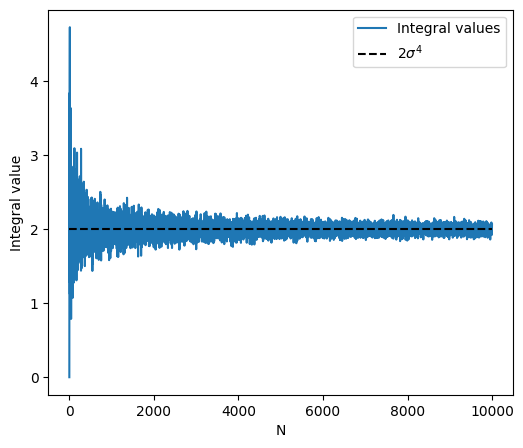

In [5]:
sigma=1
# evaluating if the integral converges to what expected as N increases
N=range(1,10000)
integral=[]
for i in N:
    # generating random points following a gaussian distribution
    xi=np.abs(np.random.normal(loc=0,scale=sigma,size=i))
    # evaluating the integral
    integral.append(np.sqrt(2*np.pi*sigma**2)*np.mean(func(xi))/2)

fig,ax=plt.subplots(1,1,figsize=(6,5))
ax.plot(N,integral,label='Integral values')
ax.hlines(2*sigma**4,0,max(N),color='black',linestyle='--',label=r'$2\sigma^4$')
ax.set(xlabel='N',ylabel='Integral value')
ax.legend()